In [1]:
using Plots, EcologicalNetworks, OTSIN, EcologicalNetworksPlots

┌ Info: Recompiling stale cache file /Users/michielstock/.julia/compiled/v1.0/EcologicalNetworksPlots/UMZhI.ji for EcologicalNetworksPlots [9f7a259d-73a7-556d-a7a2-3eb122d3865b]
└ @ Base loading.jl:1190


In [2]:
M = [1 1 1 0 0;
     1 1 0 0 0;
     0 0 0 1 1;
     0 0 1 1 0;
     0 0 1 0 0]

5×5 Array{Int64,2}:
 1  1  1  0  0
 1  1  0  0  0
 0  0  0  1  1
 0  0  1  1  0
 0  0  1  0  0

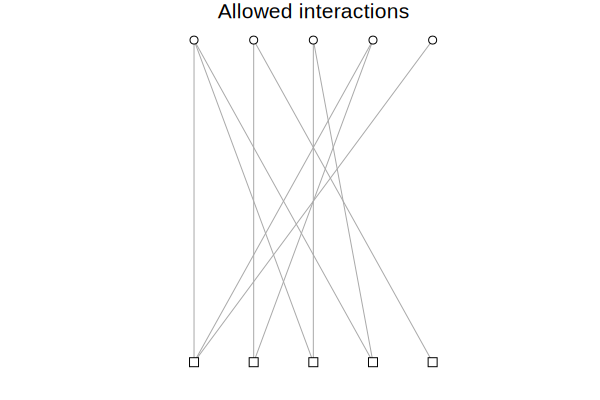

In [3]:
N = BipartiteNetwork(M.==1)

I = initial(BipartiteInitialLayout, N)
position!(NestedBipartiteLayout(0.9), I, N)
plot_connection = plot(I, N, aspectratio=1.5, title="Allowed interactions")
scatter!(I, N, bipartite=true)

In [30]:
n, m = size(M)
a, b = ones(n)/n, ones(m)/m

P_unif = optimaltransport(M, a, b, λ=100)
P_unif[P_unif .< 1e-3] .= 0;

In [31]:
P_unif

5×5 Array{Float64,2}:
 0.0999932  0.0999932  0.0       0.0      0.0
 0.100007   0.100007   0.0       0.0      0.0
 0.0        0.0        0.0       0.0      0.2
 0.0        0.0        0.0       0.19981  0.0
 0.0        0.0        0.199793  0.0      0.0

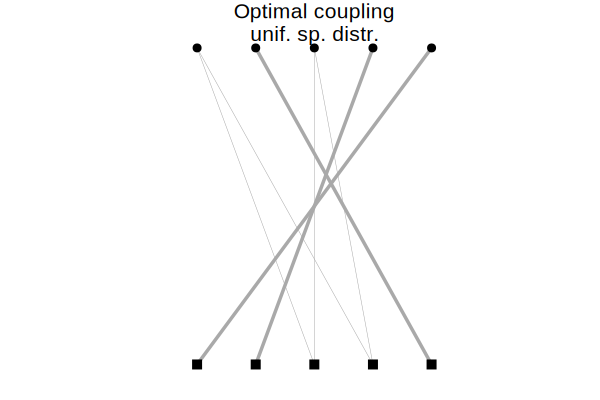

In [32]:
Nunif = BipartiteQuantitativeNetwork(P_unif)
I = initial(BipartiteInitialLayout, N)
position!(NestedBipartiteLayout(0.9), I, N)
plot_unif = plot(I, Nunif, aspectratio=1.5, title="Optimal coupling\n unif. sp. distr.")
scatter!(I, Nunif, bipartite=true, nodefill=Dict(sp => 0.2 for sp in species(Nunif)), markercolor=:Greens)

In [34]:
a, b = [0.1, 0.15, 0.3, 0.25, 0.2], [0.25, 0.15, 0.1, 0.3, 0.2]

@assert sum(a) ≈ sum(b)

P_nonunif = optimaltransport(M, a, b, λ=100)
P_nonunif[P_nonunif .< 1e-4] .= 0;

In [35]:
P_nonunif

5×5 Array{Float64,2}:
 0.0625018   0.0375011   0.0        0.0        0.0
 0.0937527   0.0562516   0.0        0.0        0.0
 0.00624793  0.00374876  0.0        0.0899945  0.2
 0.0145798   0.00874786  0.0166631  0.210006   0.0
 0.0729178   0.0437507   0.0833369  0.0        0.0

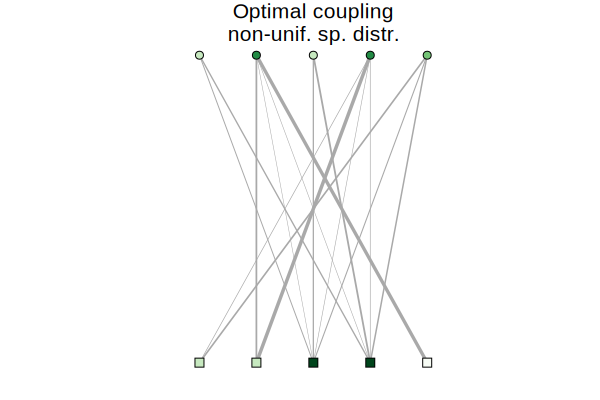

In [24]:
Nnonunif = BipartiteQuantitativeNetwork(P_nonunif)
I = initial(BipartiteInitialLayout, N)
position!(NestedBipartiteLayout(0.9), I, N)
plot_nonunif = plot(I, Nnonunif, aspectratio=1.5, title="Optimal coupling\n non-unif. sp. distr.")
scatter!(I, Nnonunif, bipartite=true, nodefill=degree(Nnonunif), markercolor=:Greens)

In [25]:
plot(plot_connection, plot_unif, plot_nonunif, layout=grid(1, 3), size=(800, 400))
savefig("figures/illustration.pdf")